<a href="https://colab.research.google.com/github/geetanjali317/GoldRatePrediction/blob/main/GoldPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Dataset from kaggle

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sid321axn/gold-price-prediction-dataset")

print("Path to dataset files:", path)

100%|██████████| 371k/371k [00:00<00:00, 44.7MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/sid321axn/gold-price-prediction-dataset/versions/1


In [3]:
cd /root/.cache/kagglehub/datasets/sid321axn/gold-price-prediction-dataset/versions/1

/root/.cache/kagglehub/datasets/sid321axn/gold-price-prediction-dataset/versions/1


In [4]:
!ls

FINAL_USO.csv


# Importing Libraries

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Data Collection and Processing

In [6]:
gold_data = pd.read_csv('FINAL_USO.csv')

In [7]:
gold_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
0,2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,...,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
1,2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,...,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2,2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,...,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
3,2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,...,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
4,2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,...,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000


In [8]:
gold_data.describe()

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
count,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,...,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03
mean,127.323434,127.854237,126.777695,127.319482,127.319482,8.446327e+06,204.490023,205.372637,203.487014,204.491222,...,26.384575,26.715012,25.924624,4.356515e+07,22.113417,22.307148,21.904657,22.109051,22.109051,1.922313e+07
std,17.526993,17.631189,17.396513,17.536269,17.536269,4.920731e+06,43.831928,43.974644,43.618940,43.776999,...,10.490908,10.603110,9.886570,2.909151e+07,11.431056,11.478671,11.373997,11.432787,11.432787,1.575743e+07
min,100.919998,100.989998,100.230003,100.500000,100.500000,1.501600e+06,122.059998,122.320000,120.029999,120.290001,...,12.400000,12.470000,12.269618,4.729000e+06,7.820000,8.030000,7.670000,7.960000,7.960000,1.035100e+06
25%,116.220001,116.540001,115.739998,116.052502,116.052502,5.412925e+06,170.392498,170.962506,169.577499,170.397500,...,20.355000,20.585000,20.180950,2.259968e+07,11.420000,11.500000,11.300000,11.392500,11.392500,6.229500e+06
50%,121.915001,122.325001,121.369999,121.795002,121.795002,7.483900e+06,205.464996,206.459999,204.430000,205.529999,...,22.870001,23.054999,22.677604,3.730465e+07,16.450000,16.635001,16.040000,16.345000,16.345000,1.613015e+07
75%,128.427494,129.087498,127.840001,128.470001,128.470001,1.020795e+07,237.292500,237.722500,236.147503,236.889996,...,26.797500,27.317500,26.478154,5.697055e+07,34.419998,34.667499,34.110000,34.417499,34.417499,2.672375e+07
max,173.199997,174.070007,172.919998,173.610001,173.610001,9.380420e+07,293.089996,293.940002,291.809998,293.579987,...,56.770000,57.470001,54.617039,2.321536e+08,41.599998,42.299999,41.299999,42.009998,42.009998,1.102657e+08


In [9]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1718 non-null   object 
 1   Open           1718 non-null   float64
 2   High           1718 non-null   float64
 3   Low            1718 non-null   float64
 4   Close          1718 non-null   float64
 5   Adj Close      1718 non-null   float64
 6   Volume         1718 non-null   int64  
 7   SP_open        1718 non-null   float64
 8   SP_high        1718 non-null   float64
 9   SP_low         1718 non-null   float64
 10  SP_close       1718 non-null   float64
 11  SP_Ajclose     1718 non-null   float64
 12  SP_volume      1718 non-null   int64  
 13  DJ_open        1718 non-null   float64
 14  DJ_high        1718 non-null   float64
 15  DJ_low         1718 non-null   float64
 16  DJ_close       1718 non-null   float64
 17  DJ_Ajclose     1718 non-null   float64
 18  DJ_volum

In [10]:
count = gold_data.nunique()
pd.set_option('display.max_rows', None)
print(count)

Date             1718
Open             1363
High             1368
Low              1356
Close            1384
Adj Close        1384
Volume           1707
SP_open          1600
SP_high          1597
SP_low           1596
SP_close         1592
SP_Ajclose       1667
SP_volume        1718
DJ_open          1713
DJ_high          1717
DJ_low           1713
DJ_close         1712
DJ_Ajclose       1712
DJ_volume        1644
EG_open           809
EG_high           836
EG_low            823
EG_close          831
EG_Ajclose       1091
EG_volume        1613
EU_Price         1268
EU_open          1282
EU_high          1259
EU_low           1292
EU_Trend            2
OF_Price         1479
OF_Open          1462
OF_High          1458
OF_Low           1472
OF_Volume        1659
OF_Trend            2
OS_Price         1470
OS_Open          1456
OS_High          1465
OS_Low           1471
OS_Trend            2
SF_Price         1636
SF_Open          1556
SF_High          1583
SF_Low           1593
SF_Volume 

In [11]:
gold_data.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0
SP_open,0
SP_high,0
SP_low,0


In [12]:
gold_data.drop('Date',axis=1,inplace = True)

# Checking for correlations between adj_close and other columns

<ipython-input-16-8a048c351bcb>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations.values, y=correlations.index, palette='hls')


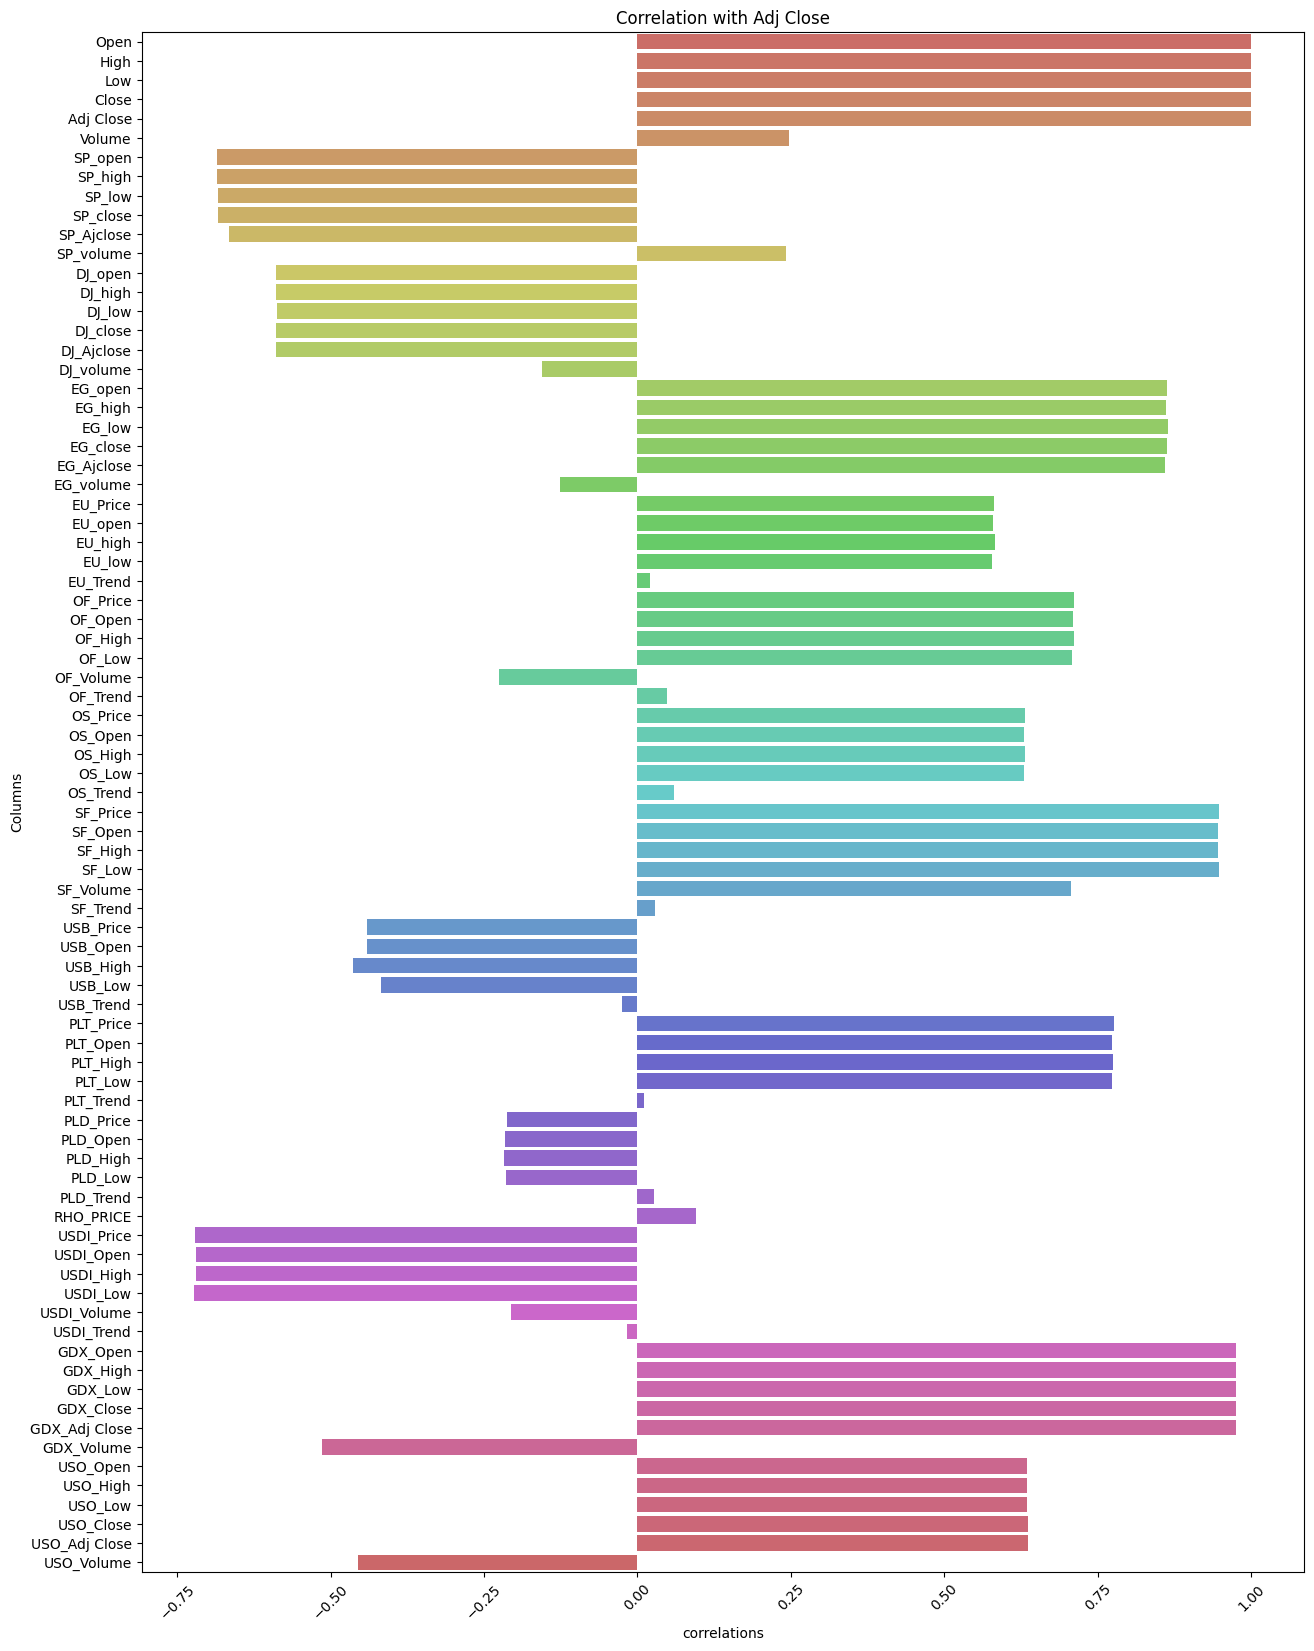

In [16]:
target_column = 'Adj Close'

# Calculate the correlation matrix
correlation_matrix = gold_data.corr()

# Select the correlation values for the target column
correlations = correlation_matrix[target_column]

# Create a bar plot or heatmap to visualize the correlations
plt.figure(figsize=(15, 20))
sns.barplot(x=correlations.values, y=correlations.index, palette='hls')
plt.title(f'Correlation with {target_column}')
plt.xlabel('correlations')
plt.ylabel('Columns')
plt.xticks(rotation=45)
plt.show()

# Selecting correlations greater than 0

In [18]:
correlated_columns = [col for col in gold_data.columns if gold_data[col].corr(gold_data['Adj Close']) > 0]
print(correlated_columns)

['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'SP_volume', 'EG_open', 'EG_high', 'EG_low', 'EG_close', 'EG_Ajclose', 'EU_Price', 'EU_open', 'EU_high', 'EU_low', 'EU_Trend', 'OF_Price', 'OF_Open', 'OF_High', 'OF_Low', 'OF_Trend', 'OS_Price', 'OS_Open', 'OS_High', 'OS_Low', 'OS_Trend', 'SF_Price', 'SF_Open', 'SF_High', 'SF_Low', 'SF_Volume', 'SF_Trend', 'PLT_Price', 'PLT_Open', 'PLT_High', 'PLT_Low', 'PLT_Trend', 'PLD_Trend', 'RHO_PRICE', 'GDX_Open', 'GDX_High', 'GDX_Low', 'GDX_Close', 'GDX_Adj Close', 'USO_Open', 'USO_High', 'USO_Low', 'USO_Close', 'USO_Adj Close']


In [19]:
df = gold_data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'SP_volume', 'EG_open', 'EG_high',
                'EG_low', 'EG_close', 'EG_Ajclose', 'EU_Price', 'EU_open', 'EU_high', 'EU_low', 'EU_Trend',
                'OF_Price', 'OF_Open', 'OF_High', 'OF_Low', 'OF_Trend', 'OS_Price', 'OS_Open', 'OS_High',
                'OS_Low', 'OS_Trend', 'SF_Price', 'SF_Open', 'SF_High', 'SF_Low', 'SF_Volume', 'SF_Trend',
                'PLT_Price', 'PLT_Open', 'PLT_High', 'PLT_Low', 'PLT_Trend', 'PLD_Trend', 'RHO_PRICE', 'GDX_Open',
                'GDX_High', 'GDX_Low', 'GDX_Close', 'GDX_Adj Close', 'USO_Open', 'USO_High', 'USO_Low', 'USO_Close', 'USO_Adj Close']]

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 50 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Open           1718 non-null   float64
 1   High           1718 non-null   float64
 2   Low            1718 non-null   float64
 3   Close          1718 non-null   float64
 4   Adj Close      1718 non-null   float64
 5   Volume         1718 non-null   int64  
 6   SP_volume      1718 non-null   int64  
 7   EG_open        1718 non-null   float64
 8   EG_high        1718 non-null   float64
 9   EG_low         1718 non-null   float64
 10  EG_close       1718 non-null   float64
 11  EG_Ajclose     1718 non-null   float64
 12  EU_Price       1718 non-null   float64
 13  EU_open        1718 non-null   float64
 14  EU_high        1718 non-null   float64
 15  EU_low         1718 non-null   float64
 16  EU_Trend       1718 non-null   int64  
 17  OF_Price       1718 non-null   float64
 18  OF_Open 

In [22]:
df.shape

(1718, 50)

In [33]:
x = df.drop("Adj Close" , axis = 1)
y = df["Adj Close"]

# Train Test Split

In [34]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size= 0.25 , random_state=42)

In [35]:
print(x_train.shape , x_test.shape , y_train.shape , y_test.shape)

(1288, 49) (430, 49) (1288,) (430,)


In [36]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
x_train_scaled = scale.fit_transform(x_train)
x_test_scaled = scale.transform(x_test)

# Training the Model

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

# Model Training and Model Evaluation

In [50]:
lr = LinearRegression()
lr.fit(x_train_scaled,y_train)
y_preds_lr = lr.predict(x_test_scaled)
print('MAE: ',mean_absolute_error(y_test,y_preds_lr))
print('MSE: ',mean_squared_error(y_test,y_preds_lr))
print('R2Score: ',r2_score(y_test,y_preds_lr))

MAE:  9.62041815719838e-14
MSE:  1.2162459304191133e-26
R2Score:  1.0


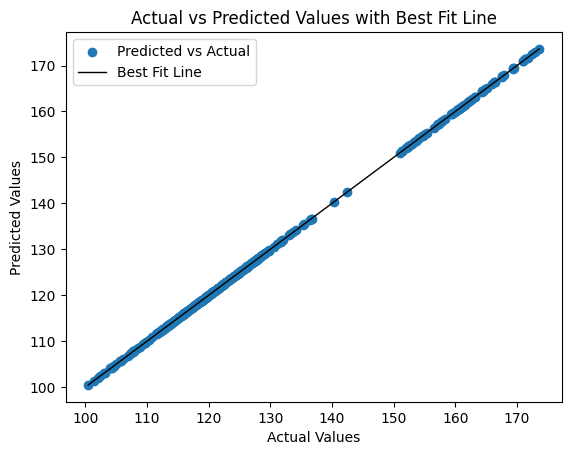

In [42]:
plt.scatter(y_test, y_preds_lr, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', linewidth=1, label='Best Fit Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values with Best Fit Line')
plt.legend()
plt.show()

Lasso

In [45]:
las = Lasso(alpha= 1)
las.fit(x_train_scaled , y_train)
y_pred = las.predict(x_test_scaled)

print("R2 Score:",r2_score(y_test , y_pred))
print("MSE:",mean_squared_error(y_test , y_pred))
print("MAE",mean_absolute_error(y_test , y_pred))

R2 Score: 0.9966452889267919
MSE: 0.9998876643732242
MAE 0.7426705994529225


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.520e+01, tolerance: 3.998e+01
  model = cd_fast.enet_coordinate_descent(


Ridge

In [47]:
rid = Ridge(alpha= 1)
rid.fit(x_train_scaled , y_train)
y_pred = rid.predict(x_test_scaled)

print("R2 Score:",r2_score(y_test , y_pred))
print("MSE:",mean_squared_error(y_test , y_pred))
print("MAE:",mean_absolute_error(y_test , y_pred))

R2 Score: 0.9998575369688942
MSE: 0.04246178711767486
MAE: 0.1316855264675845


ElasticNet

In [49]:
el = ElasticNet(alpha= 1 , l1_ratio=0.5)
el.fit(x_train_scaled , y_train)
y_pred = el.predict(x_test_scaled)

print("R2 Score:",r2_score(y_test , y_pred))
print("MSE:",mean_squared_error(y_test , y_pred))
print("MAE:",mean_absolute_error(y_test , y_pred))

R2 Score: 0.9824161327477088
MSE: 5.240955651280214
MAE: 1.8847278800312353
